### Goal

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import scipy.stats as stats
import numpy as np
import pandas as pd

# Set up plotting parameters for high-quality output
import matplotlib.pyplot as plt
plt.style.use('default')

# Higher DPI for sharper plots
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# Default figure size
plt.rcParams['figure.figsize'] = [4, 4]

# Better fonts
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 12

# Ensure plots are saved
%matplotlib inline

sys.path.append("../../data_analysis/")
import helper as hp

In [3]:
savepath = "F02_check_file/"
os.makedirs(savepath, exist_ok=True)

In [4]:
path = "/Users/michaelmoret/tinyverse/krap/data/pulling_new_machine_ex/20241126_DAN_IHNY_SDS_WAX7_0.04.xlsx"
sheet = "single phase MM"
df_wax7 = pd.read_excel(path, sheet_name=sheet)
df_wax7.head(2)

,RECORD,MEAN AREA,ESTIMATED_LENGTH(*),GRADIENT(*),EMOD(*)(#),EMOD,DECRIMPING_WORK,EXTENSION_WORK,START_X(*),START_Y,END_X(*),END_Y,ANALYSIS_WORK,BREAK_STRAIN(*)(#),BREAK_LOAD,TENSILE_STRENGTH
0,76,4574.7,30.34,0.7898,5238000000,5.238,0.000000e+00,0.01060,0.2637,21.66,0.8570,52.22,0.000031,54.417,0.881,192.6
1,77,6146.8,30.14,0.9240,4531000000,4.531,4.047000e-07,0.01343,0.2654,14.13,0.8626,41.10,0.000030,50.597,1.246,202.7


In [5]:
len(df_wax7)

25

In [6]:
df_wax7 = df_wax7.dropna()
len(df_wax7)

24

In [7]:
path = "/Users/michaelmoret/tinyverse/krap/data/pulling_new_machine_ex/20241126_DAN_IHNY_SDS_WAX7_phos.xlsx"
sheet = "single phase MM"
df_wax7_phos = pd.read_excel(path, sheet_name=sheet)
df_wax7_phos.head(2)

,RECORD,MEAN AREA,ESTIMATED_LENGTH(*),GRADIENT(*),EMOD(*)(#),EMOD,DECRIMPING_WORK,EXTENSION_WORK,START_X(*),START_Y,END_X(*),END_Y,ANALYSIS_WORK,BREAK_STRAIN(*)(#),BREAK_LOAD,TENSILE_STRENGTH
0,NaN,sq. micron,mm,N/mm,Pascals,GPa,Joules,Joules,% Strain,MPa,% Strain,MPa,Joules,% Strain,N,MPa
1,1.0,3506.9,29.97,0.3361,2872000000,2.872,0.000001,0.007232,0.2002,6.574,0.8008,24.06,0.000007,48.549,0.6863,195.7


In [8]:
len(df_wax7_phos)

26

In [9]:
df_wax7_phos = df_wax7_phos.dropna()
len(df_wax7_phos)

24

In [10]:
df_wax7_phos.columns

Index(['RECORD', 'MEAN AREA', 'ESTIMATED_LENGTH(*)', 'GRADIENT(*)',
       'EMOD(*)(#)', 'EMOD', 'DECRIMPING_WORK', 'EXTENSION_WORK', 'START_X(*)',
       'START_Y', 'END_X(*)', 'END_Y', 'ANALYSIS_WORK', 'BREAK_STRAIN(*)(#)',
       'BREAK_LOAD', 'TENSILE_STRENGTH'],
      dtype='object')

## Helper Functions

In [11]:
def do_plot(df_1, df_2, label1, label2, header):
    # Clean and convert data to numeric, dropping any non-numeric values
    df_1_clean = pd.to_numeric(df_1[header], errors='coerce').dropna()
    df_2_clean = pd.to_numeric(df_2[header], errors='coerce').dropna()

    print(f"Number of samples df_1 after cleaning: {len(df_1_clean)}")
    print(f"Number of samples df_2 Phos after cleaning: {len(df_2_clean)}")

    # Create the figure and axis objects
    fig, ax = plt.subplots(figsize=(4, 4))

    # Create the box plot with cleaned data
    box_plot = ax.boxplot([df_1_clean, df_2_clean],
                        labels=[label1, label2],
                        patch_artist=True,
                        showfliers=False,  # Remove outliers
                        medianprops=dict(color="black", linewidth=1.5),
                        boxprops=dict(facecolor='lightblue', color='black'),
                        whiskerprops=dict(color='black'),
                        capprops=dict(color='black'))

    # Calculate medians
    median_1 = np.median(df_1_clean)
    median_2 = np.median(df_2_clean)

    # Get the y-axis limits
    y_min, y_max = ax.get_ylim()
    y_range = y_max - y_min
    text_height = y_max + y_range * 0.05

    # Add median values on top of each box
    ax.text(1, text_height, f'Median: {median_1:.2f}', 
            horizontalalignment='center', verticalalignment='bottom')
    ax.text(2, text_height, f'Median: {median_2:.2f}', 
            horizontalalignment='center', verticalalignment='bottom')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Perform Mann-Whitney U test and create p-value text box
    try:
        statistic, p_value = stats.mannwhitneyu(
            df_1_clean,
            df_2_clean,
            alternative='two-sided'
        )
        significance_text = f'p = {p_value:.4f}'
        
        # Add text box with p-value in center
        props = dict(boxstyle='round', facecolor='white', alpha=0.8)
        ax.text(0.5, 0.5, significance_text, transform=ax.transAxes,
                verticalalignment='center', horizontalalignment='center',
                bbox=props, fontsize=10)
    except Exception as e:
        print("Could not perform statistical test")

    # Customize the plot
    ax.set_title(f"Comparison of {header}", fontsize=12, pad=20)
    ax.set_ylabel(f"{header}", fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.3)

    # Adjust y-axis limits to show the text labels
    ax.set_ylim(y_min, text_height + y_range * 0.1)

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Print sample sizes
    print(f"Sample size {label1}: {len(df_1_clean)}")
    print(f"Sample size {label2} Phos: {len(df_2_clean)}")

## One phase

Number of samples df_1 after cleaning: 24
Number of samples df_2 Phos after cleaning: 24


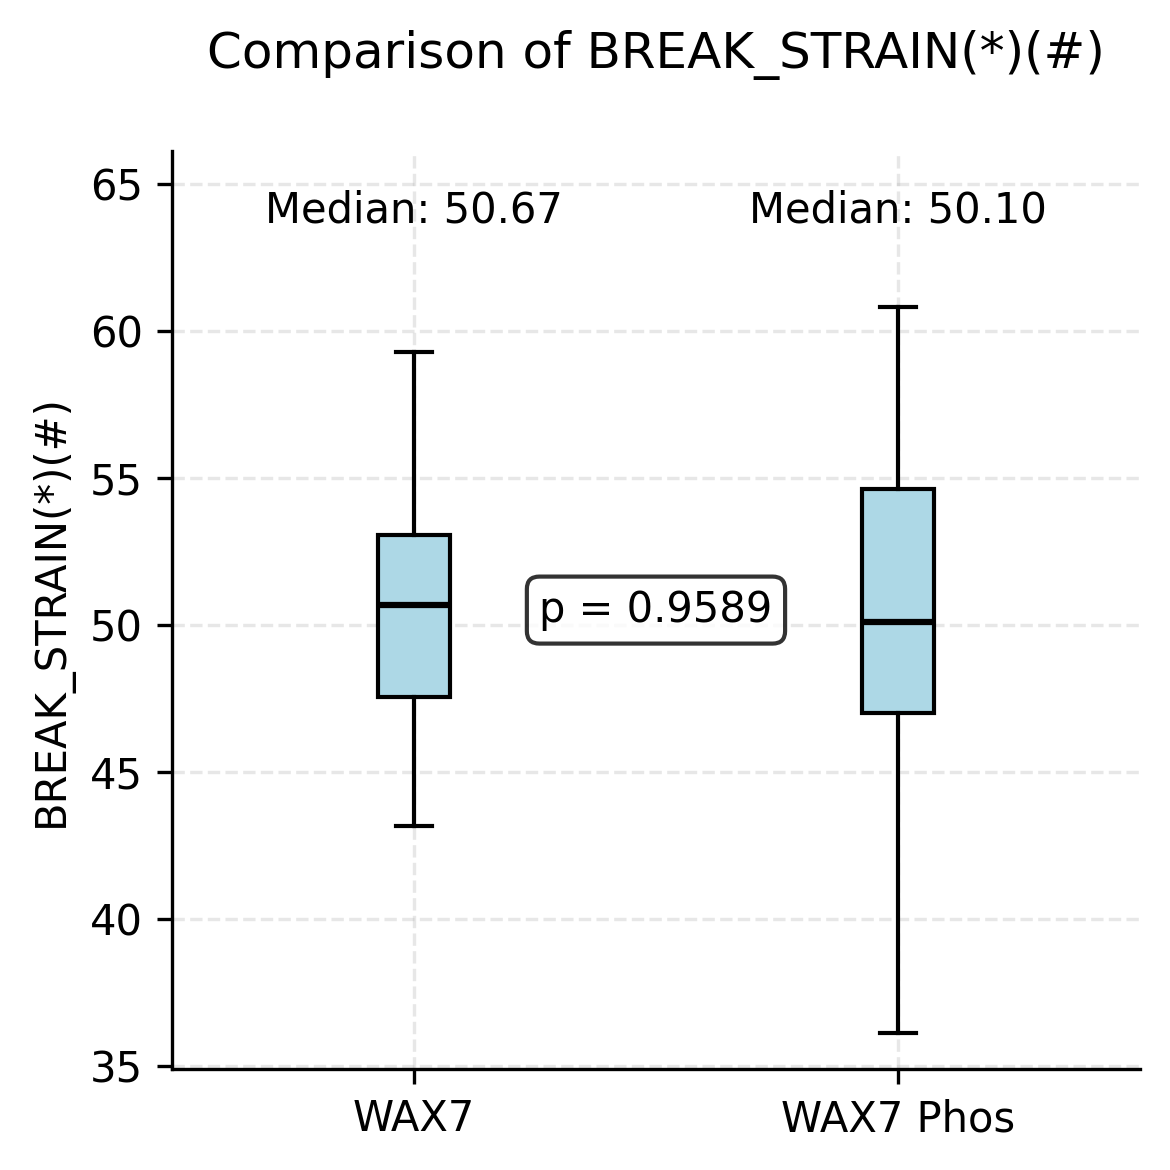

Sample size WAX7: 24
Sample size WAX7 Phos Phos: 24


In [12]:
header = "BREAK_STRAIN(*)(#)"
label1 = "WAX7"
label2 = "WAX7 Phos"
do_plot(df_wax7, df_wax7_phos,
        label1, label2,
        header)

Number of samples df_1 after cleaning: 24
Number of samples df_2 Phos after cleaning: 24


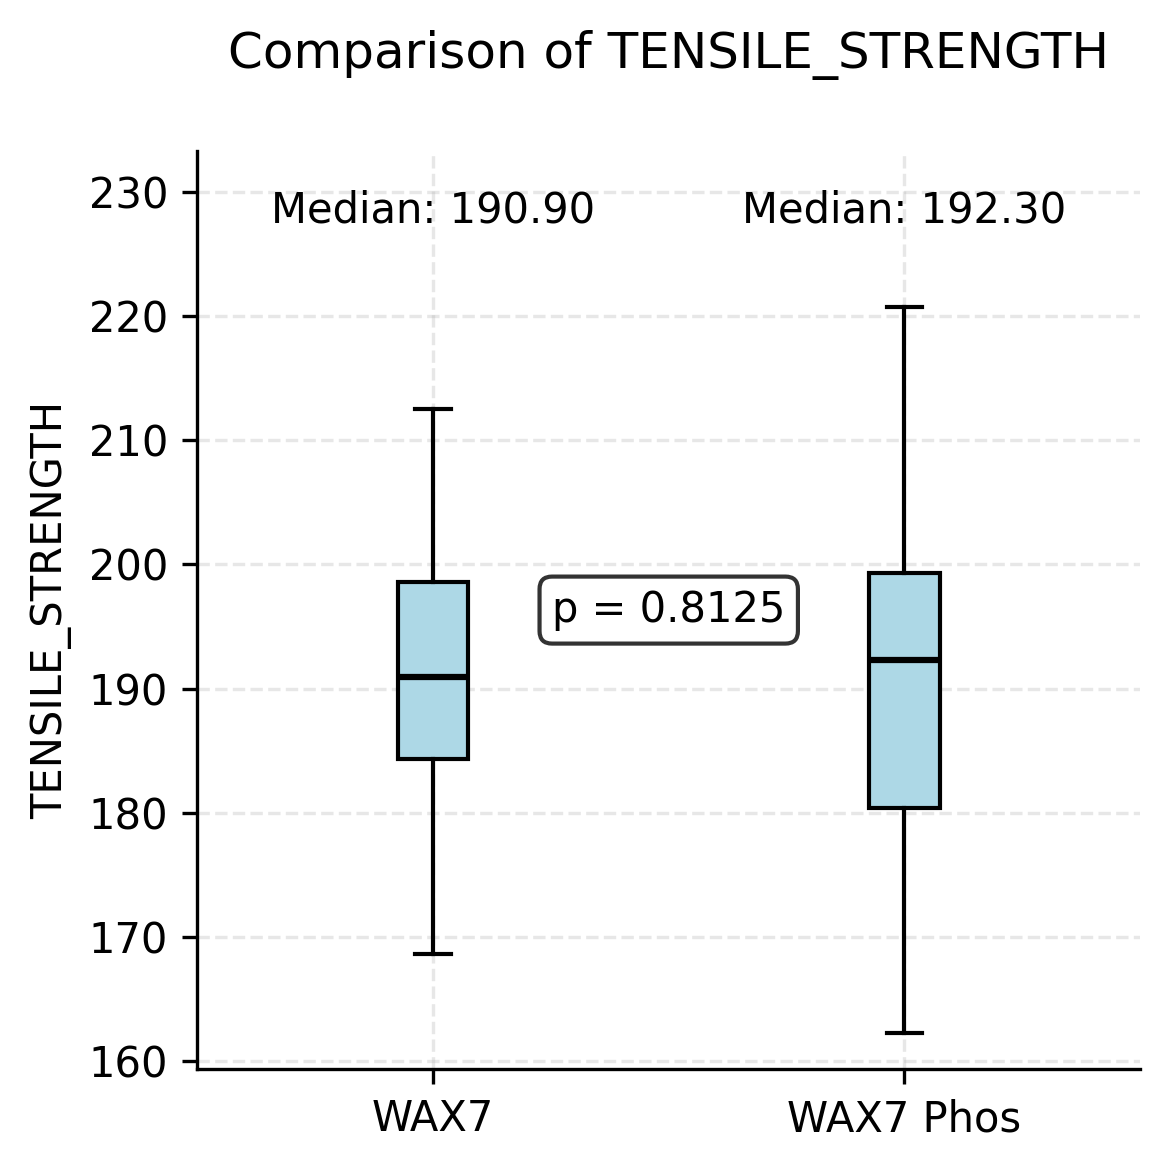

Sample size WAX7: 24
Sample size WAX7 Phos Phos: 24


In [13]:
header = "TENSILE_STRENGTH"
label1 = "WAX7"
label2 = "WAX7 Phos"
do_plot(df_wax7, df_wax7_phos,
        label1, label2,
        header)

Number of samples df_1 after cleaning: 24
Number of samples df_2 Phos after cleaning: 24


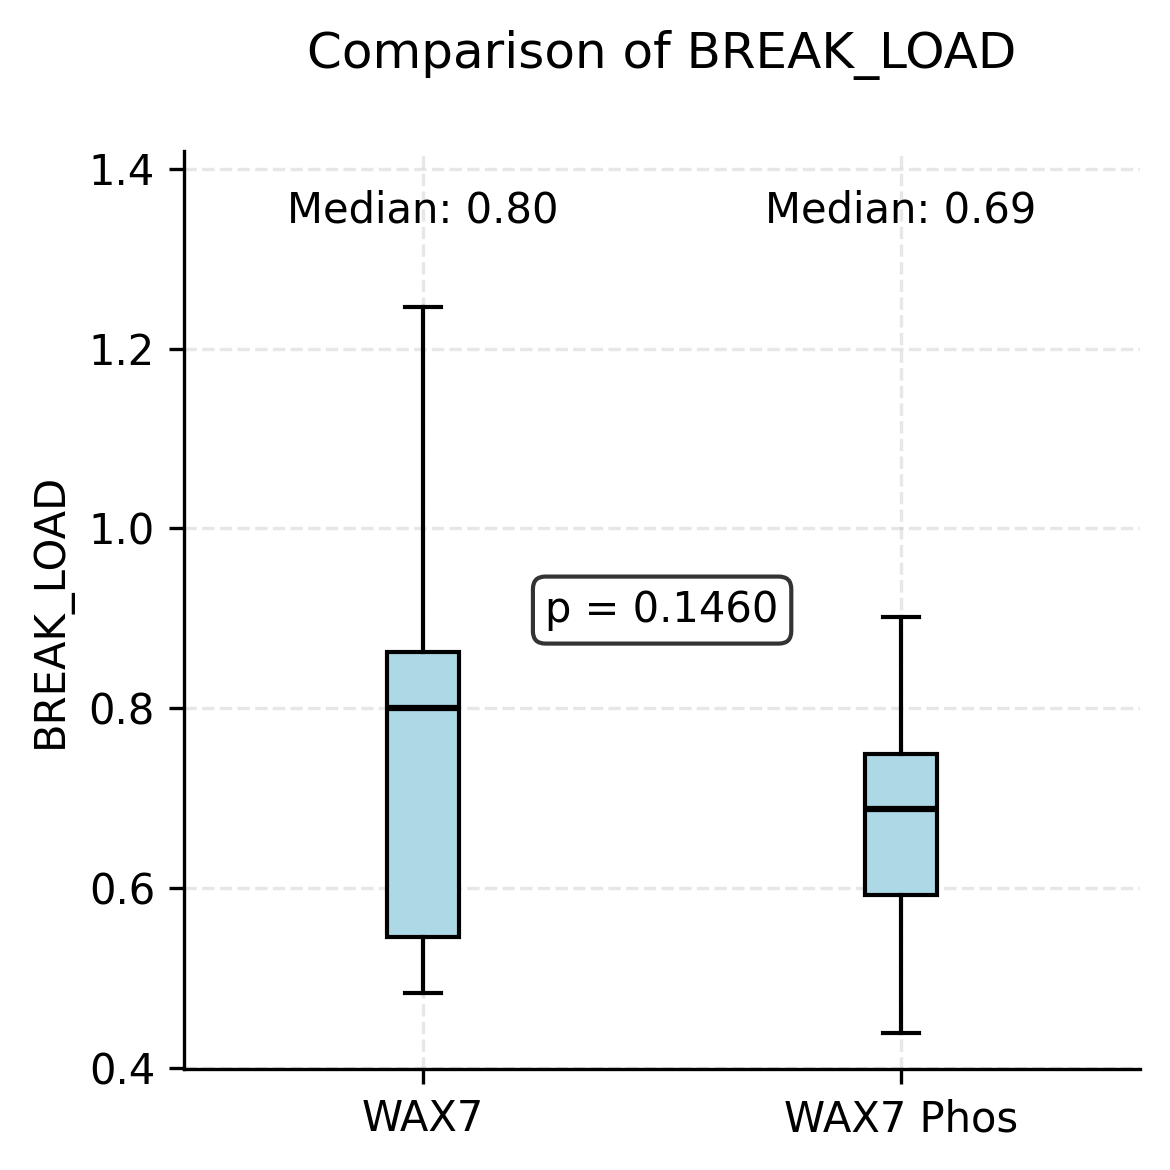

Sample size WAX7: 24
Sample size WAX7 Phos Phos: 24


In [14]:
header = "BREAK_LOAD"
label1 = "WAX7"
label2 = "WAX7 Phos"
do_plot(df_wax7, df_wax7_phos,
        label1, label2,
        header)

## Three phase

In [15]:
path = "/Users/michaelmoret/tinyverse/krap/data/pulling_new_machine_ex/20241126_DAN_IHNY_SDS_WAX7_0.04.xlsx"
sheet = "three phase MM"
df_wax7 = pd.read_excel(path, sheet_name=sheet)
df_wax7.head(2)

,RECORD,CROSS-SECTIONAL AREA,MEAN DIAMETER,MAX DIAMETER,MIN DIAMETER,ELASTIC EMOD,ELASTIC GRADIENT,ELASTIC EXT,ELASTIC STRESS,PLATEAU LOAD,...,STRESS 25%,WORK 25%,YIELD EXT,POSTYIELD GRADIENT,BREAK EXT,BREAK LOAD,BREAK STRESS,Break Stress,TOTAL WORK,TOUGHNESS
0,76,4574.7,76.6,82.8,70.4,4022000000,61.82,2.90,0.01211,57.03,...,0.01280,0.004055,28.08,3.637,54.42,89.8,0.01963,192.504540,0.01060,76400000
1,77,6146.8,92.5,112.2,69.8,3380000000,70.26,3.45,0.01245,78.76,...,0.01332,0.005479,26.41,6.020,50.60,127.0,0.02066,202.605389,0.01343,72500000


In [16]:
path = "/Users/michaelmoret/tinyverse/krap/data/pulling_new_machine_ex/20241126_DAN_IHNY_SDS_WAX7_phos.xlsx"
sheet = "three phase MM"
df_wax7_phos = pd.read_excel(path, sheet_name=sheet)
df_wax7_phos.head(2)

,RECORD,CROSS-SECTIONAL AREA,MEAN DIAMETER,MAX DIAMETER,MIN DIAMETER,ELASTIC EMOD,ELASTIC GRADIENT,ELASTIC EXT,ELASTIC STRESS,PLATEAU LOAD,...,STRESS 25%,WORK 25%,YIELD EXT,POSTYIELD GRADIENT,BREAK EXT,BREAK LOAD,BREAK STRESS,Break Stress,TOTAL WORK,TOUGHNESS
0,1,3506.9,67.7,74.8,59.7,3.970000e+09,47.35,3.20,0.01210,46.31,...,0.01373,0.003210,24.96,3.309,48.55,69.95,0.01995,195.642668,0.007233,68820000.0
1,2,3659.9,71.0,85.3,54.6,3.775000e+09,46.76,2.79,0.01198,44.81,...,0.01269,0.003177,26.29,2.965,51.46,67.40,0.01842,180.638493,0.007579,68760000.0


In [17]:
df_wax7_phos.columns

Index(['RECORD', 'CROSS-SECTIONAL AREA', 'MEAN DIAMETER', 'MAX DIAMETER',
       'MIN DIAMETER', 'ELASTIC EMOD', 'ELASTIC GRADIENT', 'ELASTIC EXT',
       'ELASTIC STRESS', 'PLATEAU LOAD', 'PLATEAU STRESS', 'LOAD 15%',
       'STRESS 15%', 'WORK 15%', 'LOAD 25%', 'STRESS 25%', 'WORK 25%',
       'YIELD EXT', 'POSTYIELD GRADIENT', 'BREAK EXT', 'BREAK LOAD',
       'BREAK STRESS', 'Break Stress', 'TOTAL WORK', 'TOUGHNESS'],
      dtype='object')

Number of samples df_1 after cleaning: 24
Number of samples df_2 Phos after cleaning: 24


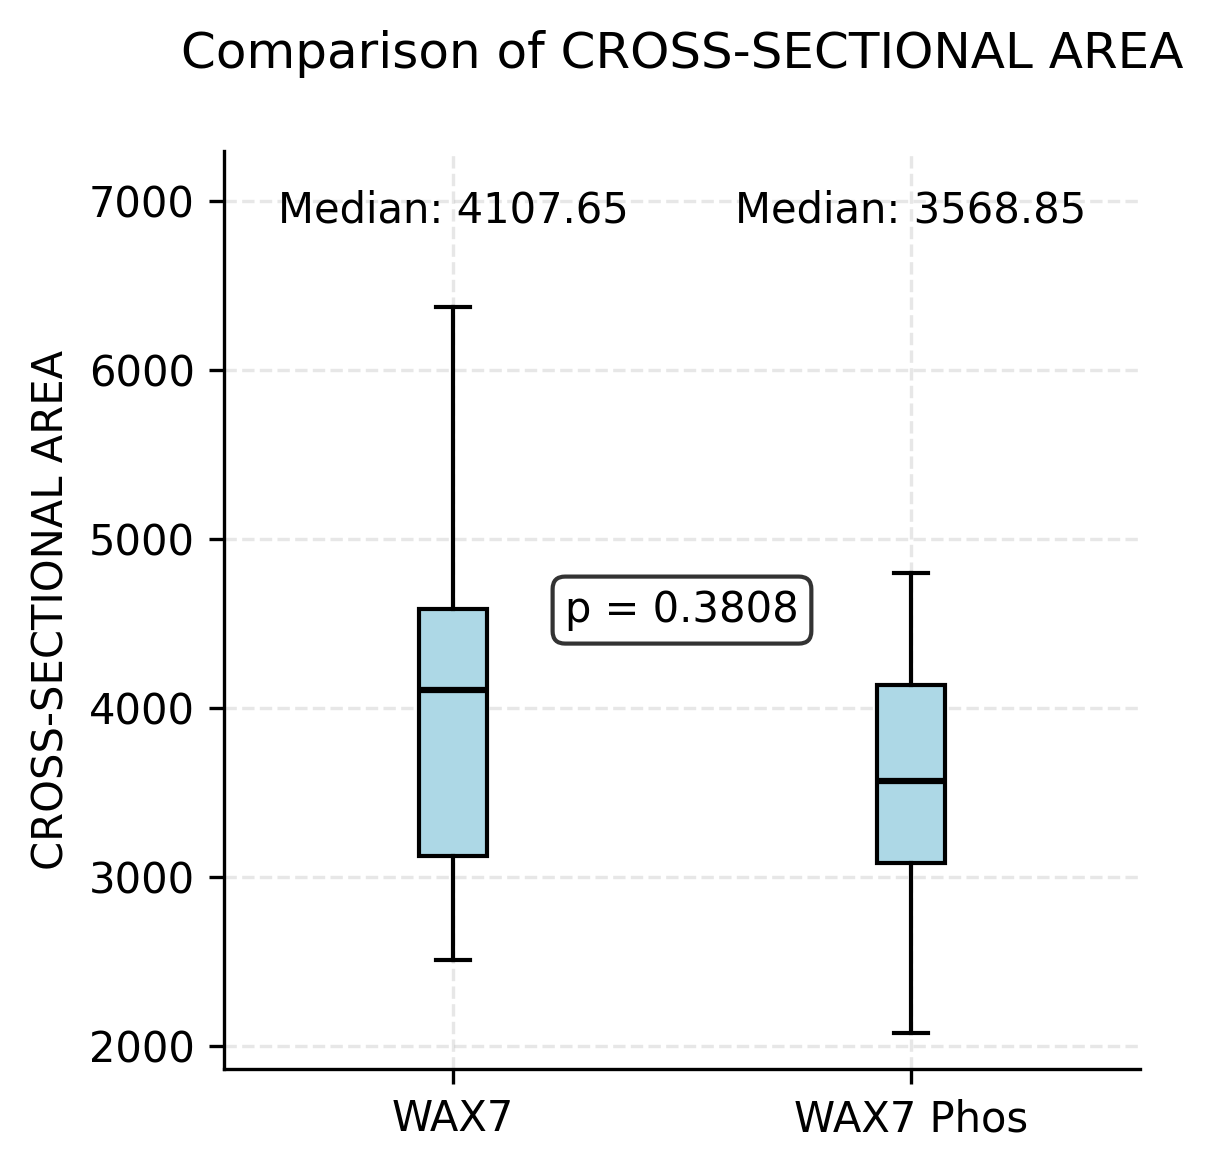

Sample size WAX7: 24
Sample size WAX7 Phos Phos: 24


In [18]:
header = "CROSS-SECTIONAL AREA"
label1 = "WAX7"
label2 = "WAX7 Phos"
do_plot(df_wax7, df_wax7_phos,
        label1, label2,
        header)

Number of samples df_1 after cleaning: 25
Number of samples df_2 Phos after cleaning: 24


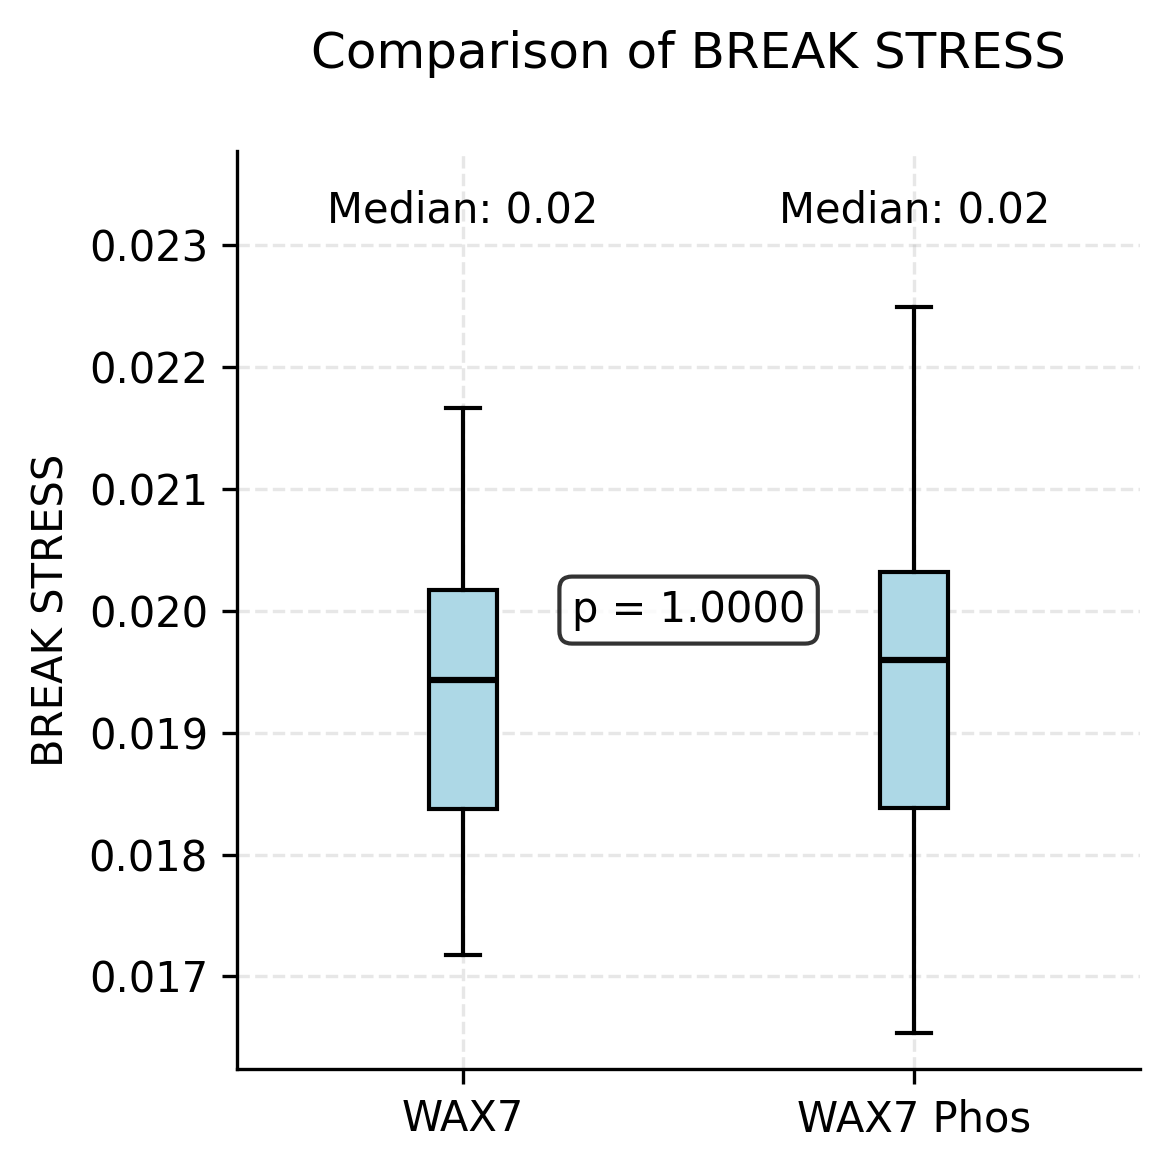

Sample size WAX7: 25
Sample size WAX7 Phos Phos: 24


In [19]:
header = "BREAK STRESS"
label1 = "WAX7"
label2 = "WAX7 Phos"
do_plot(df_wax7, df_wax7_phos,
        label1, label2,
        header)

Number of samples df_1 after cleaning: 25
Number of samples df_2 Phos after cleaning: 24


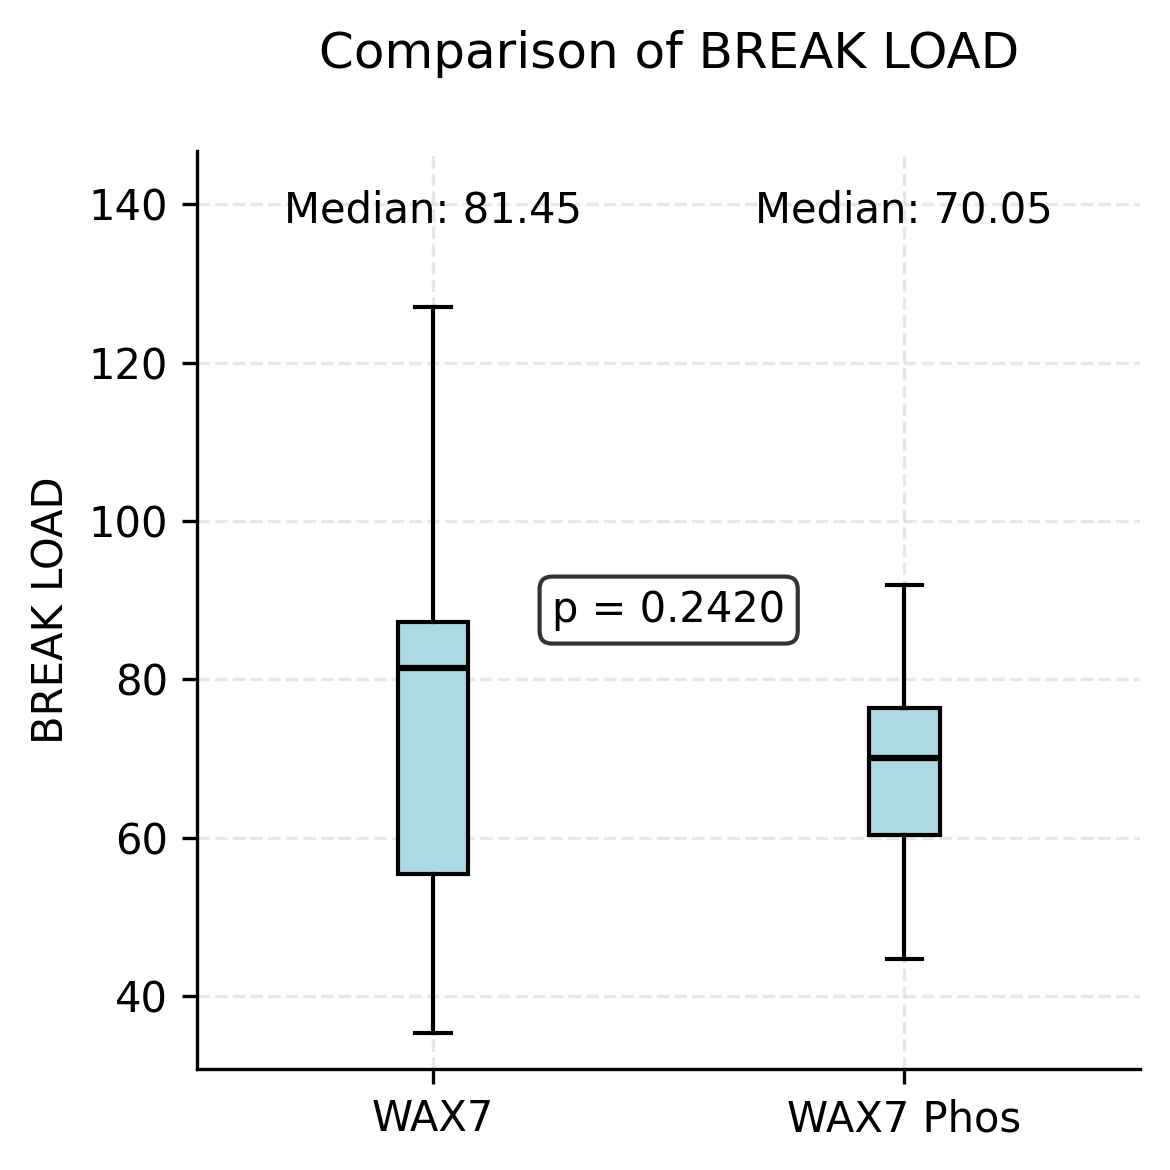

Sample size WAX7: 25
Sample size WAX7 Phos Phos: 24


In [20]:
header = "BREAK LOAD"
label1 = "WAX7"
label2 = "WAX7 Phos"
do_plot(df_wax7, df_wax7_phos,
        label1, label2,
        header)

Number of samples df_1 after cleaning: 25
Number of samples df_2 Phos after cleaning: 24


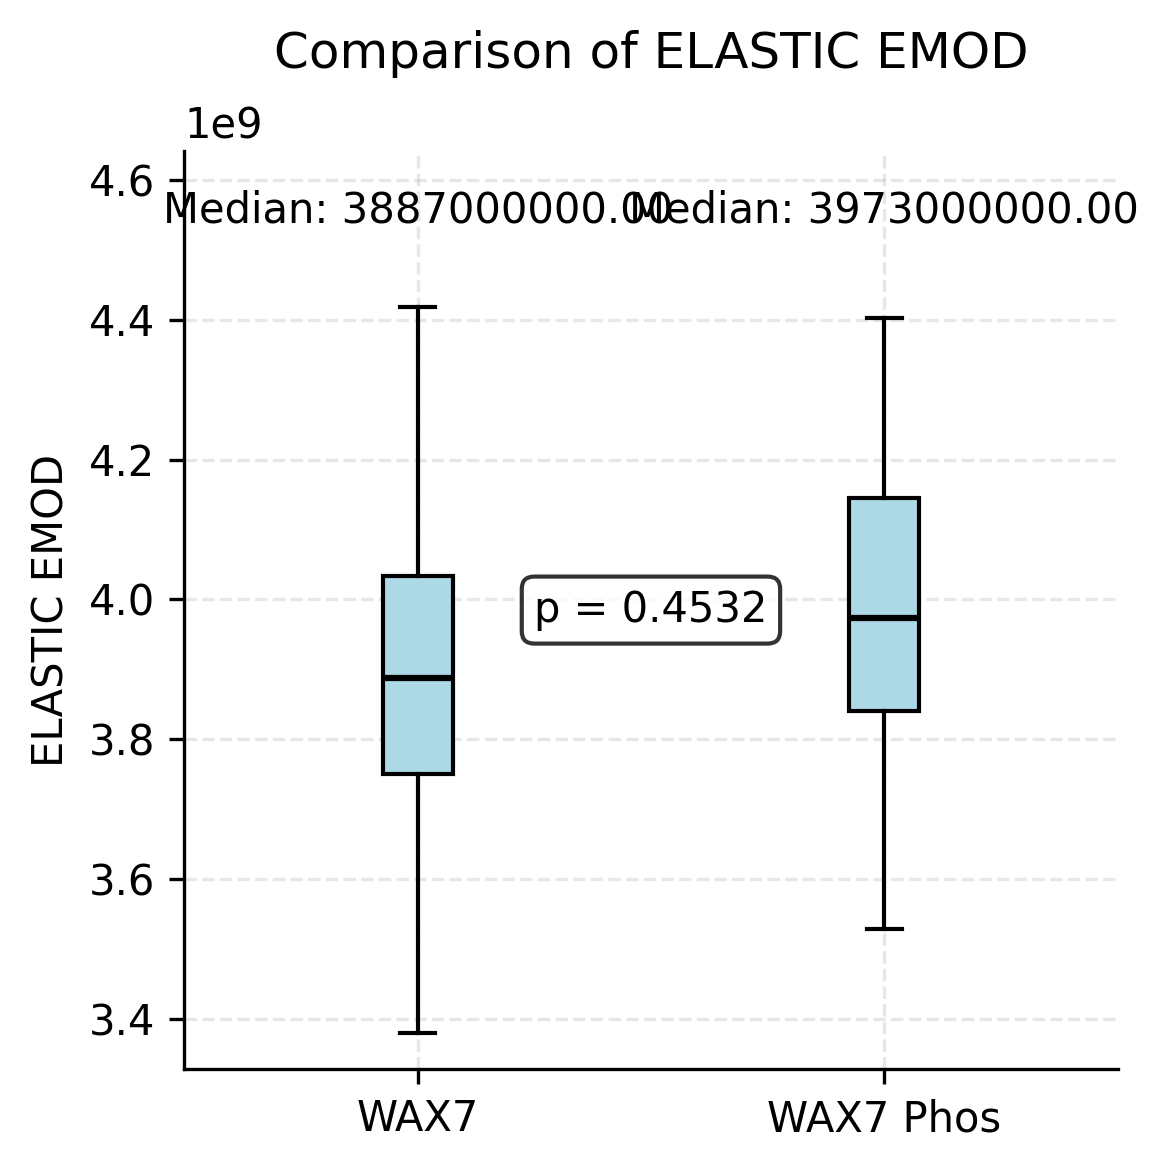

Sample size WAX7: 25
Sample size WAX7 Phos Phos: 24


In [21]:
header = "ELASTIC EMOD"
label1 = "WAX7"
label2 = "WAX7 Phos"
do_plot(df_wax7, df_wax7_phos,
        label1, label2,
        header)

Number of samples df_1 after cleaning: 25
Number of samples df_2 Phos after cleaning: 24


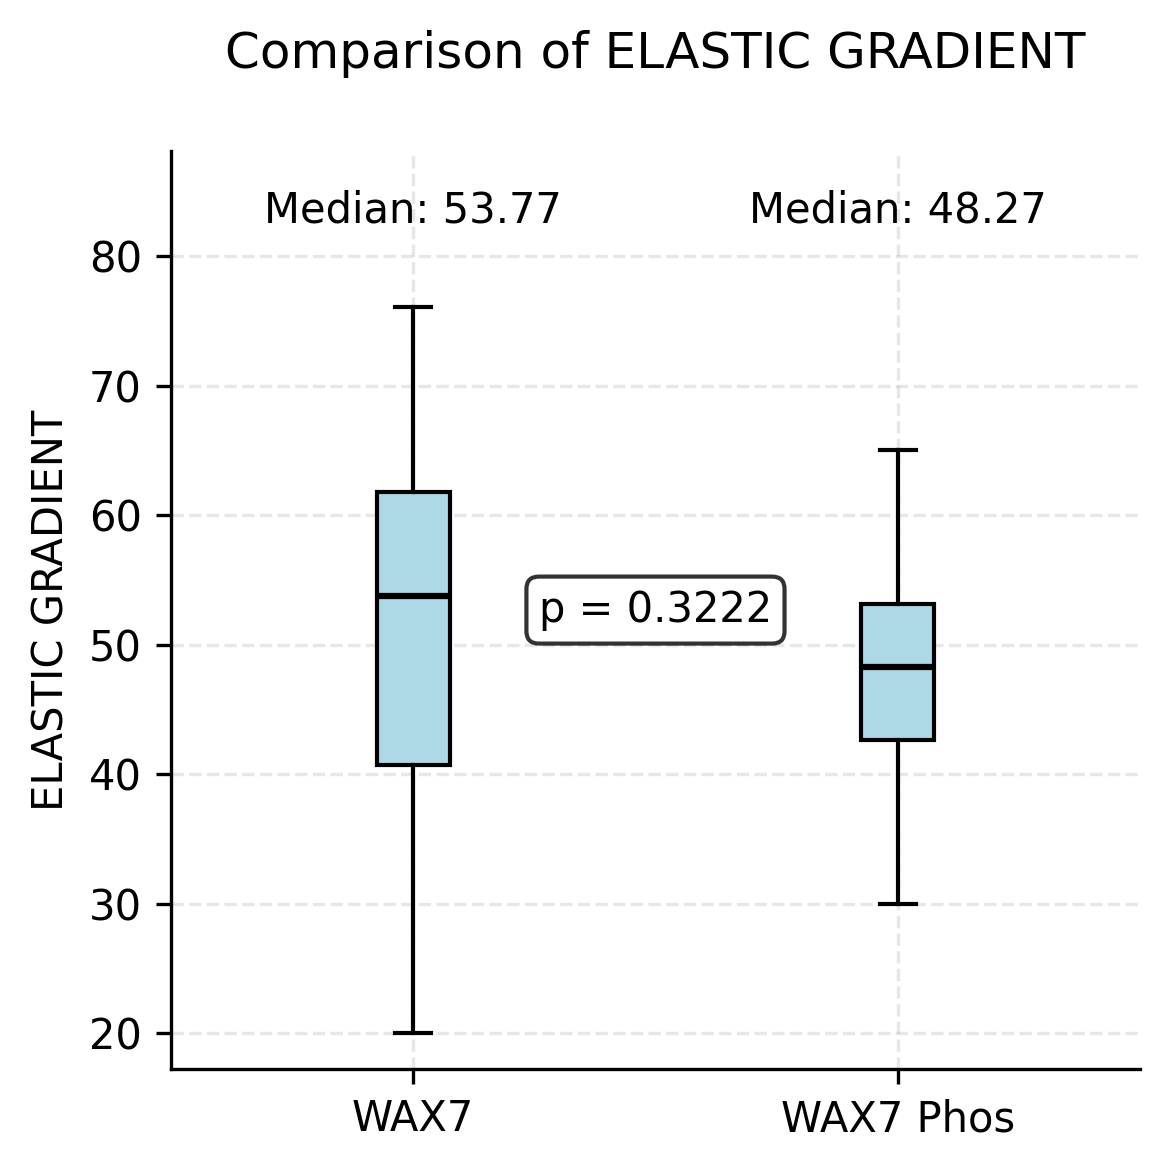

Sample size WAX7: 25
Sample size WAX7 Phos Phos: 24


In [22]:
header = "ELASTIC GRADIENT"
label1 = "WAX7"
label2 = "WAX7 Phos"
do_plot(df_wax7, df_wax7_phos,
        label1, label2,
        header)

Number of samples df_1 after cleaning: 25
Number of samples df_2 Phos after cleaning: 24


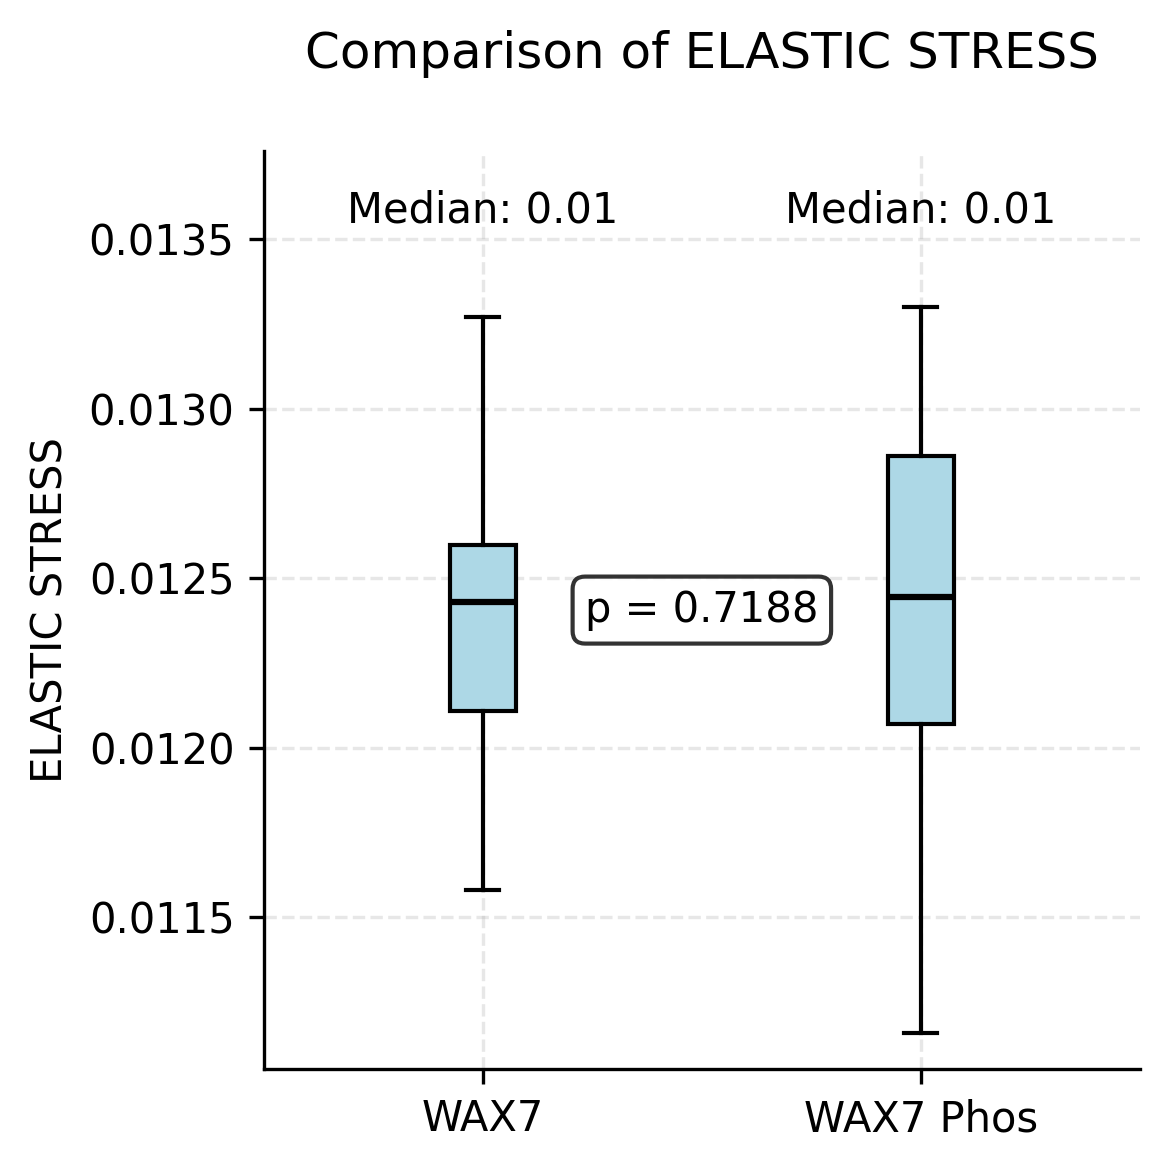

Sample size WAX7: 25
Sample size WAX7 Phos Phos: 24


In [23]:
header = "ELASTIC STRESS"
label1 = "WAX7"
label2 = "WAX7 Phos"
do_plot(df_wax7, df_wax7_phos,
        label1, label2,
        header)